In [ ]:
from google.colab import files
import os

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammedsarim","key":"fc5b1fa260ef578209dcea095eac25c0"}'}

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 672M/675M [00:37<00:00, 18.4MB/s]
100% 675M/675M [00:37<00:00, 18.8MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('D:/Games/cell_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
infected = '/content/cell_images/cell_images/Parasitized'
uninfected = '/content/cell_images/cell_images/Uninfected'

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
# from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
# data=pd

In [ ]:
infected_images = []
for file in os.listdir(infected):
    if file == 'Thumbs.db':
        pass
    else:
        img = Image.open(os.path.join(infected, file))
        img = img.resize((36,36))
        img = np.asarray(img)
        infected_images.append(img)

In [ ]:
uninfected_images = []
for file in os.listdir(uninfected):
    if file == 'Thumbs.db':
        pass
    else:
        img = Image.open(os.path.join(uninfected, file))
        img = img.resize((36,36))
        img = np.asarray(img)
        uninfected_images.append(img)

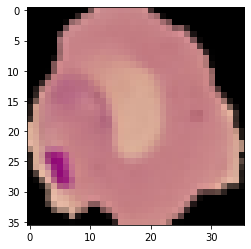

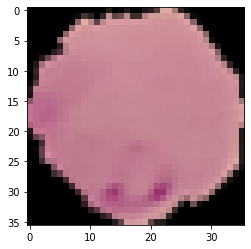

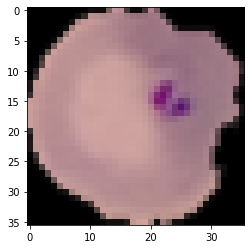

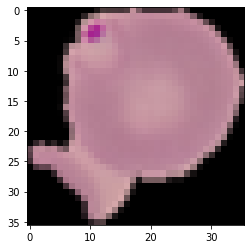

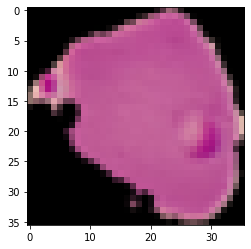

In [ ]:
for i in range(5):
    plt.imshow(infected_images[i])
    plt.show()

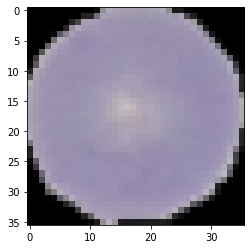

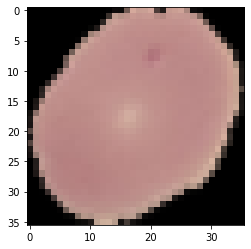

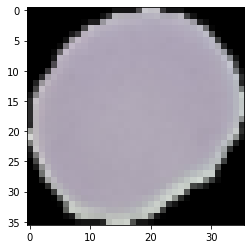

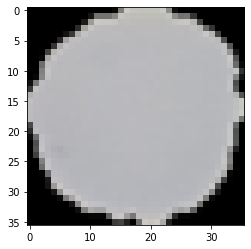

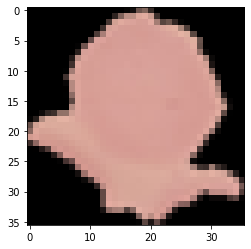

In [ ]:
for i in range(5):
    plt.imshow(uninfected_images[i])
    plt.show()

In [ ]:
images = np.asarray(infected_images + uninfected_images)
images.shape

(27558, 36, 36, 3)

In [ ]:
labels = np.asarray([1 for _ in range(len(infected_images))] + [0 for _ in range(len(uninfected_images))])
labels.shape

(27558,)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
images, labels = shuffle(images, labels)

1


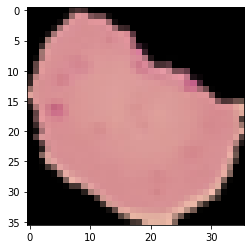

0


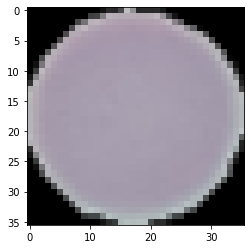

0


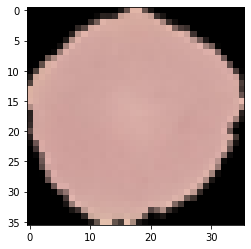

1


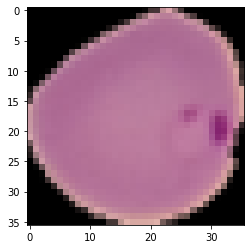

0


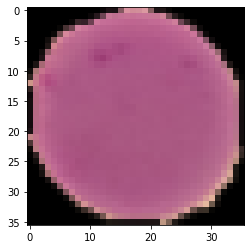

0


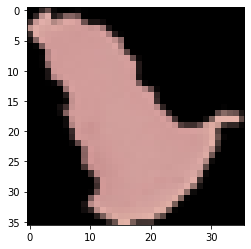

0


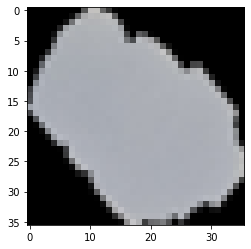

0


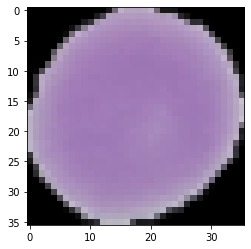

1


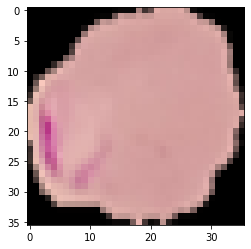

1


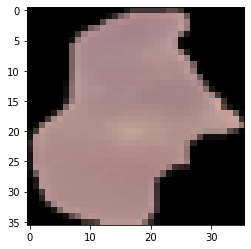

In [ ]:
for i in range(10):
    print(labels[i])
    plt.imshow(images[i])
    plt.show()

In [ ]:
# np.save('images.npy', images)
# np.save('labels.npy', labels)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels = to_categorical(labels, num_classes = 2)
labels[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [ ]:
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (22046, 36, 36, 3) (22046, 2)
Test size: (5512, 36, 36, 3) (5512, 2)


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(96, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/15
689/689 [==============================] - 20s 13ms/step - loss: 0.3996 - accuracy: 0.8248 - val_loss: 0.3269 - val_accuracy: 0.8647
Epoch 2/15
689/689 [==============================] - 7s 11ms/step - loss: 0.2514 - accuracy: 0.9018 - val_loss: 0.2524 - val_accuracy: 0.9044
Epoch 3/15
689/689 [==============================] - 8s 11ms/step - loss: 0.2274 - accuracy: 0.9119 - val_loss: 0.3055 - val_accuracy: 0.8710
Epoch 4/15
689/689 [==============================] - 7s 10ms/step - loss: 0.2178 - accuracy: 0.9177 - val_loss: 0.2054 - val_accuracy: 0.9240
Epoch 5/15
689/689 [==============================] - 8s 11ms/step - loss: 0.2017 - accuracy: 0.9240 - val_loss: 0.3287 - val_accuracy: 0.8915
Epoch 6/15
689/689 [==============================] - 8s 11ms/step - loss: 0.2037 - accuracy: 0.9223 - val_loss: 0.2364 - val_accuracy: 0.9222
Epoch 7/15
689/689 [==============================] - 7s 11ms/step - loss: 0.1935 - accuracy: 0.9291 - val_loss: 0.2375 - val_accuracy: 0.911

In [ ]:
pred = [np.argmax(i) for i in model.predict(X_test)]
pred[:5]

173/173 [==============================] - 1s 4ms/step


[0, 1, 0, 0, 1]

In [ ]:
tru = [np.argmax(i) for i in y_test]
from sklearn.metrics import confusion_matrix
confusion_matrix(tru, pred)

array([[2663,  118],
       [ 302, 2429]])

In [ ]:
model.save('malaria.h5')